##INVESTIGATING TITANIC DATASET

Dataset 'titanic_data.csv' contains demographics and passenger information from 891 of the 2224 passengers and crew on board of Titanic. We will analyze the dataset to answer the question based on different combinations.

What factors made people more likely to survive?

###Common functions which will be used to analyze survival rate

In [291]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read csv file function
def read_file(file_name):
    return pd.read_csv(file_name)

#Group by method based on the column
def groupby(columns):
   return titanic_data.groupby(columns)

#Get survival rate based on the column
def survival_rate(columns):
   return groupby(columns)['survived'].mean()

#Draw bar graph based on passed in data
def draw_graph(data):
    return data.plot(kind = 'bar')

#Print data and generate a graph based on column
def print_table_graph(columns):
    temp = survival_rate(columns)
    print temp
    ax = temp.plot(kind = 'bar', legend = True)
    ax.set_xlabel(str(columns))
    ax.set_ylabel("Survived")

#print data and generate 
def print_hist(column):
    figure = plt.figure()
    x = figure.add_subplot(111)
    x.hist(titanic_data[column], bins = 10, range = (titanic_data[column].min(),titanic_data[column].max()))
    plt.title(str(column)+' Distribution')
    plt.xlabel(str(column))
    plt.ylabel('Passengers')
    plt.show()

#print cross tab
def print_crosstab(columns):
    temp = pd.crosstab(columns, titanic_data.survived.astype(bool))
    temp.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)
    
    

##Data gathering and preparing
### Load titanic data from csv in to a variable,  rename all the columns to lower case and print statistical data.

In [292]:
#Load titanic_data.csv into titanic variable.
titanic_data = read_file("titanic_data.csv")

#Rename all the columns in the data set to lower case.
titanic_data.rename(columns = lambda x: x.lower(), inplace = True)

#Print statistical data about the data set.
titanic_data.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###Missing values

In [293]:
print 'Total Number of records:' + str(titanic_data['passengerid'].count())
print 'Number of Age values missing:' + str(titanic_data['passengerid'].count() - titanic_data['age'].count())
print 'Number of Cabin values missing:' + str(titanic_data['passengerid'].count() - titanic_data['cabin'].count())

Total Number of records:891
Number of Age values missing:177
Number of Cabin values missing:687


##Data Analysis

###Overall survival rate based on the survived attribute.

In [294]:
#Group by survived attribute
survived = groupby('survived')

# Overall survival list
pid_df = survived.agg({'passengerid' : 'size'})
pid_df / len(titanic_data)

,passengerid
survived,
0,0.616162
1,0.383838


Overall survival rate based on survived attribute is 38%

### Survival rate based on the pclass attribute.

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64


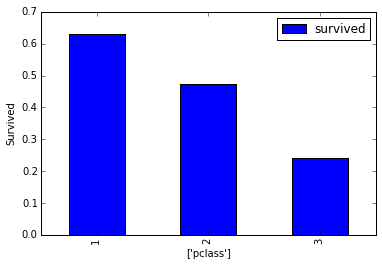

In [295]:
print_table_graph(['pclass'])

### Survival rate based on the sex attribute.

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


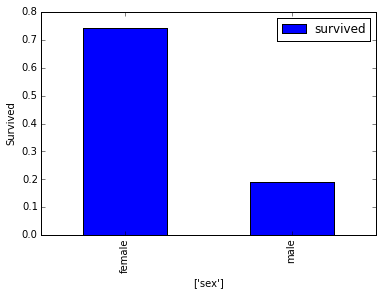

In [296]:
print_table_graph(['sex'])

### Survival rate based on the siblings and spouse attribute.

sibsp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: survived, dtype: float64


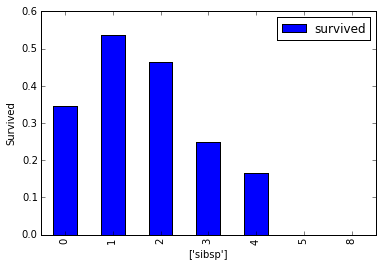

In [297]:
print_table_graph(['sibsp'])

Passengers with 1 or 2 siblings have survived more

### Survival rate based on the parents and childrens attribute.

parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: survived, dtype: float64


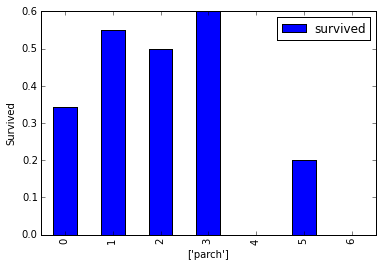

In [298]:
print_table_graph(['parch'])

None of the Passengers with parents and children 4 and 5 have survived.

### Survival rate based on the embarked attribute.

embarked
C    0.553571
Q    0.389610
S    0.336957
Name: survived, dtype: float64


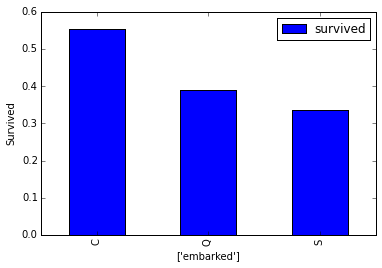

In [299]:
print_table_graph(['embarked'])



Passengers who embarked from C have survived more.

### Survival rate based on the pclass and sex attributes.

pclass  sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: survived, dtype: float64


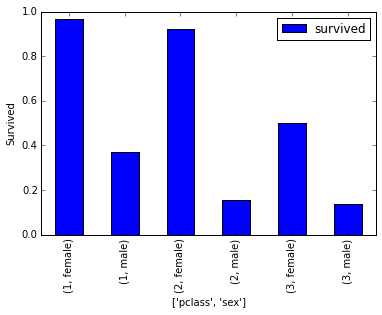

In [300]:
print_table_graph(['pclass','sex'])

Female passengers have survived more in all classes

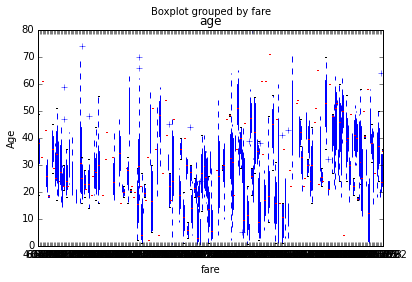

In [301]:
ax = titanic_data.boxplot(column='age', by='fare', grid=False)
ax.set_ylabel('Age')


{'boxes': [<matplotlib.lines.Line2D at 0x168886d90>],
 'caps': [<matplotlib.lines.Line2D at 0x168896f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x1688c2790>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1688a5f10>],
 'whiskers': [<matplotlib.lines.Line2D at 0x168896050>,
  <matplotlib.lines.Line2D at 0x168886b10>]}

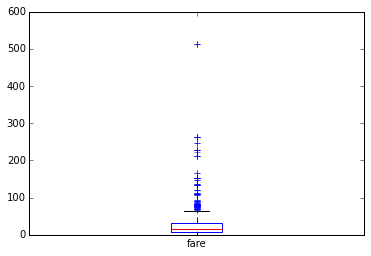

In [302]:
titanic_data.boxplot( column='fare', grid=False)

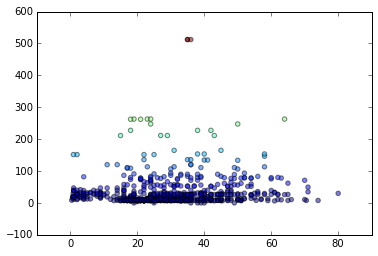

In [303]:
scatter_plot = plt.scatter(titanic_data['age'], titanic_data['fare'], alpha=0.5, 
                           c=titanic_data['fare'])
plt.show()

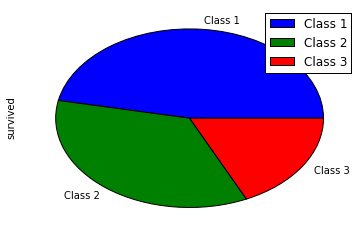

In [304]:
survival_rate(['pclass']).plot(kind = 'pie', legend = True,labels =[ 'Class 1', 'Class 2', 'Class 3'])

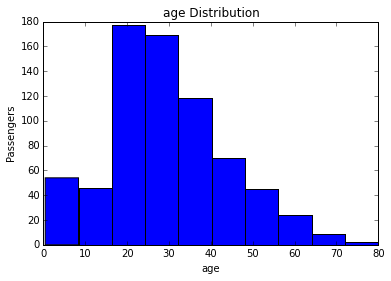

In [305]:
print_hist('age')

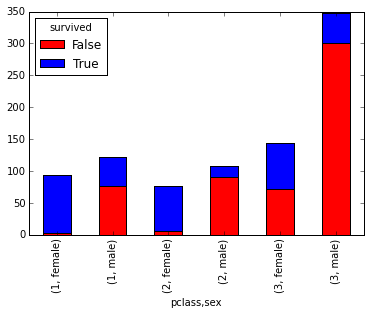

In [306]:
print_crosstab([titanic_data.pclass, titanic_data.sex])


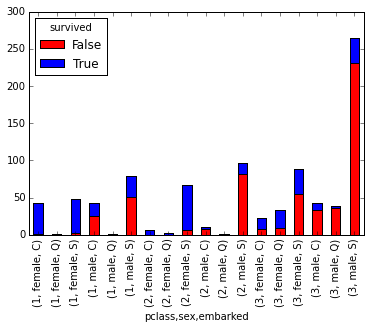

In [307]:
print_crosstab([titanic_data.pclass, titanic_data.sex, titanic_data.embarked])


Based on the data set survival rates across different criteria varies differently. Below are some of the characteristics where passengers have survived.


- First class passengers have survival rate is more than second and third class.
- Overall survival rate based on survived attribute is 38%
- Female passengers have survived more than male passengers. 3:1 female vs males ratio
- Passengers with 1 or 2 siblings have survived more
- None of the Passengers with parents and children 4 and 5 have survived.
- Passengers who embarked from C have survived more.
- female passengers in class 2 embarked from S survived more.

Total number of passengers in the dataset was 891 where as the total passengers on board was 1317. This dataset cannot be used for whole popuplation.  
